# Projeto Final On34 {Reprograma}

# Análise Financeiro:

Esse projeto consiste na análise de Consultoria. O objetivo desse projeto é ajudar o cliente a decidir quais ações investir.
Para desenvolver esse projeto, desenvolvi uma análise exploratória do Índice Bovespa.E utilizamos o Tableau para gerar a visualização da análise.

# Bases escolhidas:

* [text](Cotações+diárias+por+empresa.xlsx)- Índice Bovespa
* [text](Informações+e+indicadores+por+empresa.xlsx)- Índice Bovespa


link:https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/ibovespa.htm

# Ferramentas utilizadas:

* Python
* Pandas 
* Matplotlib
* Jupyter Notebook



In [1]:
import pandas as pd

Inicialmente, será realizado o tratamento do dataset de cotações diárias por empresa. Este processo visa garantir a qualidade e a integridade dos dados, eliminando inconsistências, valores ausentes e duplicidades, de forma a preparar o dataset para análises subsequentes.

In [2]:

# Carregar o dataset
df = pd.read_excel('Cotações+diárias+por+empresa.xlsx')


In [3]:
# Renomeando o df
cotacoes_diarias = df

In [4]:
cotacoes_diarias

date   Open   High    Low  Close Ticker
0      2021-07-05  17.42  18.00  17.36  17.94  ABEV3
1      2021-07-02  17.39  17.63  17.25  17.43  ABEV3
2      2021-07-01  16.86  17.32  16.82  17.20  ABEV3
3      2021-06-30  17.15  17.46  17.02  17.07  ABEV3
4      2021-06-29  17.35  17.50  16.90  17.29  ABEV3
...           ...    ...    ...    ...    ...    ...
256186 2008-07-17  22.95  22.96  22.40  22.79  YDUQ3
256187 2008-07-16  23.89  23.89  22.31  23.00  YDUQ3
256188 2008-07-15  23.28  23.95  23.00  23.00  YDUQ3
256189 2008-07-14  23.79  24.00  23.75  23.95  YDUQ3
256190 2008-07-11  23.94  23.94  23.71  23.71  YDUQ3

[256191 rows x 6 columns]

In [5]:
# Describe apenas colunas numéricas
print(cotacoes_diarias[['Open', 'High', 'Low', 'Close']].describe())



               Open           High            Low          Close
count  256191.00000  256191.000000  256191.000000  256191.000000
mean       31.42559      31.937336      30.869392      31.407435
std        61.18581      62.219656      59.946202      60.983391
min         0.00750       0.007800       0.007300       0.007400
25%        13.53000      13.770000      13.280000      13.520000
50%        22.50000      22.880000      22.080000      22.500000
75%        34.86000      35.400000      34.260000      34.850000
max      2170.00000    2220.000000    2085.010000    2170.000000


In [6]:
#  quantidade de valores nulos em cada coluna
cotacoes_diarias.isnull().sum()


date      0
Open      0
High      0
Low       0
Close     0
Ticker    0
dtype: int64

In [7]:
#  quantidade de linhas e colunas
num_linhas, num_colunas = df.shape

 
print("Quantidade de Linhas:", num_linhas)
print("Quantidade de Colunas:", num_colunas)


Quantidade de Linhas: 256191
Quantidade de Colunas: 6


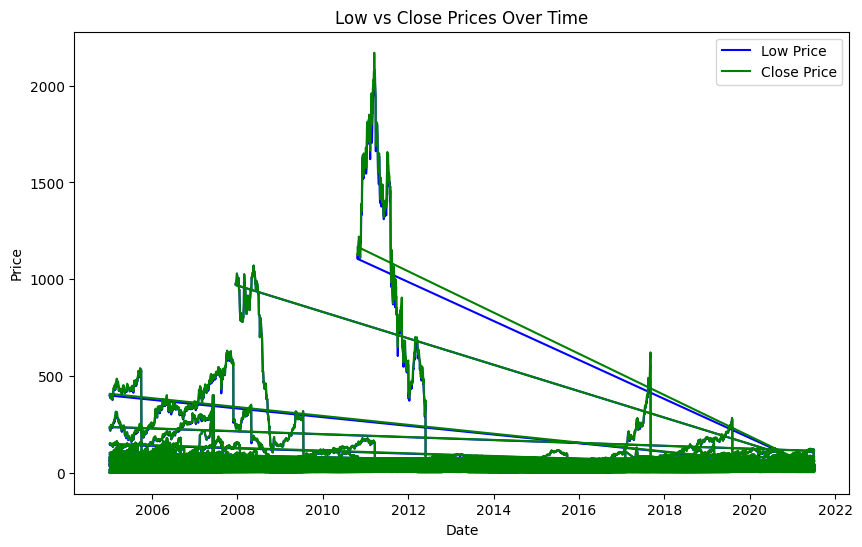

In [8]:
import matplotlib.pyplot as plt

#  gráfico de linha para 'low' e 'close' ao longo do tempo
plt.figure(figsize=(10, 6))
plt.plot(cotacoes_diarias['date'], cotacoes_diarias['Low'], label='Low Price', color='blue')
plt.plot(cotacoes_diarias['date'], cotacoes_diarias['Close'], label='Close Price', color='green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Low vs Close Prices Over Time')
plt.legend()
plt.show()


O gráfico apresentado mostra a evolução dos preços mínimos e de fechamento de um determinado ativo (ação, índice, commodity, etc.) ao longo de um período que se estende de 2006 a 2022.

A distância entre as linhas do preço mínimo e do preço de fechamento indica a volatilidade do ativo. Quanto maior a distância, maior a variação dos preços durante um determinado período. 

# INFORMAÇÕES:

Investidores: Ao analisar a tendência histórica dos preços, podem tomar decisões mais informadas sobre compra, venda ou manutenção de um ativo.

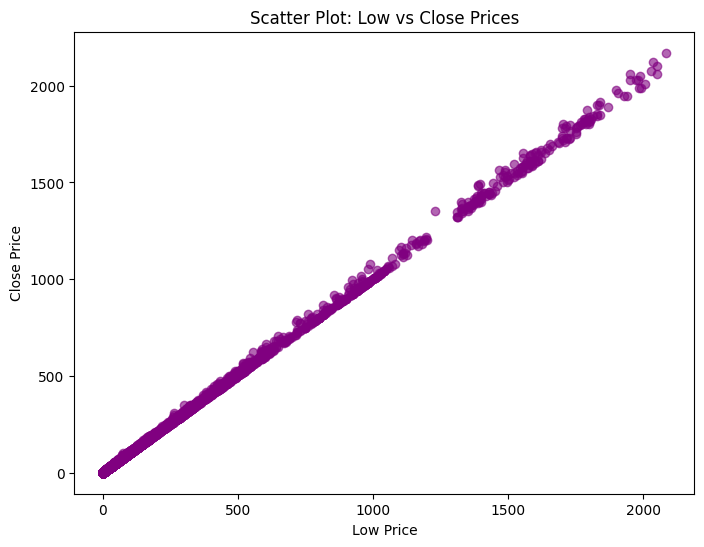

In [9]:
# Gráfico de dispersão para 'low' e 'close'
plt.figure(figsize=(8, 6))
plt.scatter(cotacoes_diarias['Low'], cotacoes_diarias['Close'], color='purple', alpha=0.6)
plt.xlabel('Low Price')
plt.ylabel('Close Price')
plt.title('Scatter Plot: Low vs Close Prices')
plt.show()


O gráfico de dispersão mostra uma forte relação positiva entre os preços mínimos (Low) e de fechamento (Close) do ativo. Isso significa que, em geral, quando o preço mínimo do dia aumenta, o preço de fechamento também tende a aumentar. Essa relação é esperada, pois o preço de fechamento não pode ser inferior ao preço mínimo.

# CONCLUSÃO
 Podemos concluir que nessa primeira análise existe uma forte relação entre preços minimos e de fechamento.
 Tendencia de Alta em relação aos preços minimos
 

# Iniciando o tratamento do segundo banco de dados INFORMAÇÕES E INDICADORES POR EMPRESA

 Tratamento do df2 Informações+Indicadores+Empresa. Este processo visa garantir a qualidade e a integridade dos dados, eliminando inconsistências, valores ausentes e duplicidades, de forma a preparar o df para análises subsequentes

In [10]:

# Carregar o dataset
df2 = pd.read_excel('Informações+e+indicadores+por+empresa.xlsx')


In [11]:
# Renomeando dataset

infor_indi_empresa = df2

In [12]:
print(infor_indi_empresa.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ticker         81 non-null     object 
 1   Empresa        81 non-null     object 
 2   Setor          81 non-null     object 
 3   Subsetor       81 non-null     object 
 4   Cotacao        81 non-null     float64
 5   PL             81 non-null     float64
 6   Div_Yield      81 non-null     float64
 7   Cres_Rec_5a    81 non-null     float64
 8   Marg_Liquida   81 non-null     float64
 9   ROIC           81 non-null     float64
 10  ROE            81 non-null     float64
 11  Liquidez_Corr  73 non-null     float64
dtypes: float64(8), object(4)
memory usage: 7.7+ KB
None


In [13]:
infor_indi_empresa

Ticker                    Empresa                          Setor  \
0   ABEV3               AMBEV S/A ON                        Bebidas   
1   AZUL4                    AZUL PN                     Transporte   
2   B3SA3                      B3 ON  Serviços Financeiros Diversos   
3   BBAS3    BANCO DO BRASIL S.A. ON     Intermediários Financeiros   
4   BBDC3  BANCO BRADESCO S.A. ON N1     Intermediários Financeiros   
..    ...                        ...                            ...   
76  VALE3                 VALE ON NM                      Mineração   
77  VIVT3            TELEF BRASIL ON               Telecomunicações   
78  VVAR3               VIAVAREJO ON                       Comércio   
79  WEGE3               WEG SA ON N1        Máquinas e Equipamentos   
80  YDUQ3              YDUQS PART ON                       Diversos   

                          Subsetor  Cotacao      PL  Div_Yield  Cres_Rec_5a  \
0         Cervejas e Refrigerantes    17.94   21.87      0.027        0.075   
1                 Transporte Aéreo    44.35   -2.05      0.000       -0.130   
2    Serviços Financeiros Diversos    16.11   22.52      0.055        0.402   
3                           Bancos    31.94    6.79      0.063       -0.044   
4                           Bancos    21.23   10.68      0.049       -0.014   
..                             ...      ...     ...        ...          ...   
76              Minerais Metálicos   113.17   10.62      0.078        0.237   
77                Telecomunicações    42.10   15.61      0.076        0.004   
78                Eletrodomésticos    15.48   21.12      0.000        0.071   
79  Motores, Compressores e Outros    34.91   54.98      0.009        0.198   
80           Serviços Educacionais    32.58 -380.26      0.014        0.047   

    Marg_Liquida   ROIC    ROE  Liquidez_Corr  
0          0.212  0.156  0.157           1.16  
1         -1.567 -0.115  0.442           0.45  
2          0.446  0.201  0.180           1.78  
3          0.000  0.000  0.106            NaN  
4          0.000  0.000  0.134            NaN  
..           ...    ...    ...            ...  
76         0.221  0.343  0.271           1.96  
77         0.106  0.059  0.065           1.07  
78         0.039  0.109  0.190           1.01  
79         0.144  0.237  0.223           2.06  
80        -0.007  0.036 -0.008           2.52  

[81 rows x 12 columns]

In [14]:
# Verificar se há valores nulos
print(infor_indi_empresa.isnull().sum())


Ticker           0
Empresa          0
Setor            0
Subsetor         0
Cotacao          0
PL               0
Div_Yield        0
Cres_Rec_5a      0
Marg_Liquida     0
ROIC             0
ROE              0
Liquidez_Corr    8
dtype: int64


In [15]:
# Exibir as linhas onde Liquidez_Corrente é nulo
infor_indi_empresa[infor_indi_empresa['Liquidez_Corr'].isnull()]


Ticker                    Empresa                       Setor  \
3    BBAS3    BANCO DO BRASIL S.A. ON  Intermediários Financeiros   
4    BBDC3  BANCO BRADESCO S.A. ON N1  Intermediários Financeiros   
5    BBDC4  BANCO BRADESCO S.A. PN N1  Intermediários Financeiros   
6    BBSE3         BBSEGURIDADE ON NM       Previdência e Seguros   
8   BPAC11             BTGP BANCO UNT  Intermediários Financeiros   
45   IRBR3         IRBBRASIL RE ON NM       Previdência e Seguros   
47   ITUB4         ITAUUNIBANCO PN N1  Intermediários Financeiros   
67  SANB11              SANTANDER UNT  Intermediários Financeiros   

       Subsetor  Cotacao     PL  Div_Yield  Cres_Rec_5a  Marg_Liquida  ROIC  \
3        Bancos    31.94   6.79      0.063       -0.044         0.000   0.0   
4        Bancos    21.23  10.68      0.049       -0.014         0.000   0.0   
5        Bancos    25.01  12.58      0.046       -0.014         0.000   0.0   
6   Seguradoras    22.91  11.61      0.059        0.000         0.000   0.0   
8        Bancos    31.41  24.72      0.009       -0.012         0.000   0.0   
45  Seguradoras     5.72  -4.89      0.033       -0.293        -0.174   0.0   
47       Bancos    29.60  12.91      0.022       -0.142         0.000   0.0   
67       Bancos    40.52  11.47      0.039       -0.001         0.000   0.0   

      ROE  Liquidez_Corr  
3   0.106            NaN  
4   0.134            NaN  
5   0.134            NaN  
6   0.551            NaN  
8   0.160            NaN  
45 -0.338            NaN  
47  0.160            NaN  
67  0.170            NaN

 Optei por deixar os valores (0) pode ser importante lidar com esses valores, para garantir que não comprometa minha análise

In [22]:


# estatistico
describe = infor_indi_empresa[['Cotacao', 'PL', 'Div_Yield', 'Cres_Rec_5a', 'Marg_Liquida', 'ROIC', 'ROE', 'Liquidez_Corr']].describe()
print(describe)

#   calcula média, mediana e moda de colunas especificadas
colunas = ['Cotacao', 'PL', 'Div_Yield', 'Cres_Rec_5a', 'Marg_Liquida', 'ROIC', 'ROE', 'Liquidez_Corr']
for coluna in colunas:
    media = infor_indi_empresa[coluna].mean()
    mediana = infor_indi_empresa[coluna].median()
    moda = infor_indi_empresa[coluna].mode().values

    print(f"\nPara a coluna '{coluna}':")
    print(f" - Média: {media}")
    print(f" - Mediana: {mediana}")
    print(f" - Moda: {moda}")


          Cotacao           PL  Div_Yield  Cres_Rec_5a  Marg_Liquida  \
count   81.000000    81.000000  81.000000    81.000000     81.000000   
mean    29.865926    61.402222   0.033580     0.092407      0.079753   
std     18.483895   616.954615   0.037024     0.166871      0.366211   
min      3.650000 -1360.290000   0.000000    -0.293000     -1.567000   
25%     18.790000     6.120000   0.005000     0.000000      0.000000   
50%     26.930000    11.470000   0.023000     0.071000      0.092000   
75%     37.230000    22.520000   0.051000     0.155000      0.202000   
max    113.170000  5348.890000   0.159000     0.716000      1.328000   

            ROIC        ROE  Liquidez_Corr  
count  81.000000  81.000000      73.000000  
mean    0.089593   0.115346       1.810548  
std     0.091337   0.455379       0.904915  
min    -0.178000  -3.023000       0.240000  
25%     0.036000   0.085000       1.180000  
50%     0.094000   0.141000       1.630000  
75%     0.127000   0.218000       2.

In [17]:
# Groupby por Setor e calcular média do Dividend Yield de cada empresa
divi_yield_setor = infor_indi_empresa.groupby('Setor')['Div_Yield'].mean().reset_index()

In [18]:
print(divi_yield_setor)

                                   Setor  Div_Yield
0                  Alimentos Processados   0.039000
1                Análises e Diagnósticos   0.029250
2                                Bebidas   0.027000
3                               Comércio   0.004200
4                Comércio e Distribuição   0.030250
5                       Construção Civil   0.059750
6                               Diversos   0.008250
7                       Energia Elétrica   0.082455
8                  Exploração de Imóveis   0.008667
9             Intermediários Financeiros   0.036429
10                       Madeira e Papel   0.000000
11                Material de Transporte   0.000000
12                             Mineração   0.075500
13               Máquinas e Equipamentos   0.009000
14       Petróleo, Gás e Biocombustíveis   0.029833
15                 Previdência e Seguros   0.045333
16  Produtos de Uso Pessoal e de Limpeza   0.000000
17                  Programas e Serviços   0.007000
18          

C:\Users\User\AppData\Local\Temp\ipykernel_16592\647273131.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Setor', y='Div_Yield', data=divi_yield_setor, palette=palette, edgecolor='black')


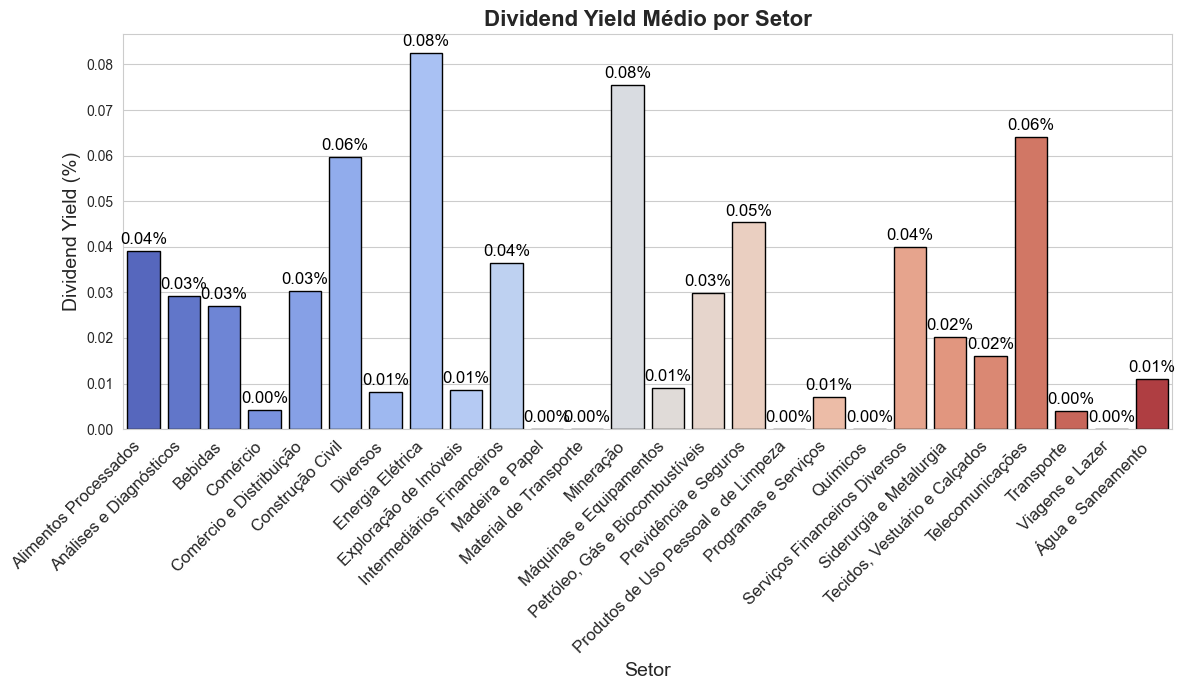

In [23]:
import seaborn as sns # biblioteca


# Ajuste
plt.figure(figsize=(12,7))
sns.set_style("whitegrid")  # Estilo do fundo
palette = sns.color_palette("coolwarm", len(divi_yield_setor))  # Paleta de cores

#Grafico
ax = sns.barplot(x='Setor', y='Div_Yield', data=divi_yield_setor, palette=palette, edgecolor='black')

# Rotulos e titulo
plt.title('Dividend Yield Médio por Setor', fontsize=16, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotacionar e alinhar os rótulos do eixo X
plt.ylabel('Dividend Yield (%)', fontsize=14)
plt.xlabel('Setor', fontsize=14)

# Valores na Barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Ajustar o layout
plt.tight_layout()


plt.show()


Este gráfico dá uma boa visão sobre quais setores possuem empresas mais orientadas para o pagamento de dividendos. Setores com alta distribuição de dividendos como Energia Elétrica e Mineração podem ser atrativos para investidores que buscam retornos estáveis a partir de dividendos, enquanto setores com Dividend Yield baixo ou nulo podem indicar que as empresas estão focando mais em reinvestir seus lucros em expansão ou inovação, em vez de devolver dinheiro diretamente aos acionistas

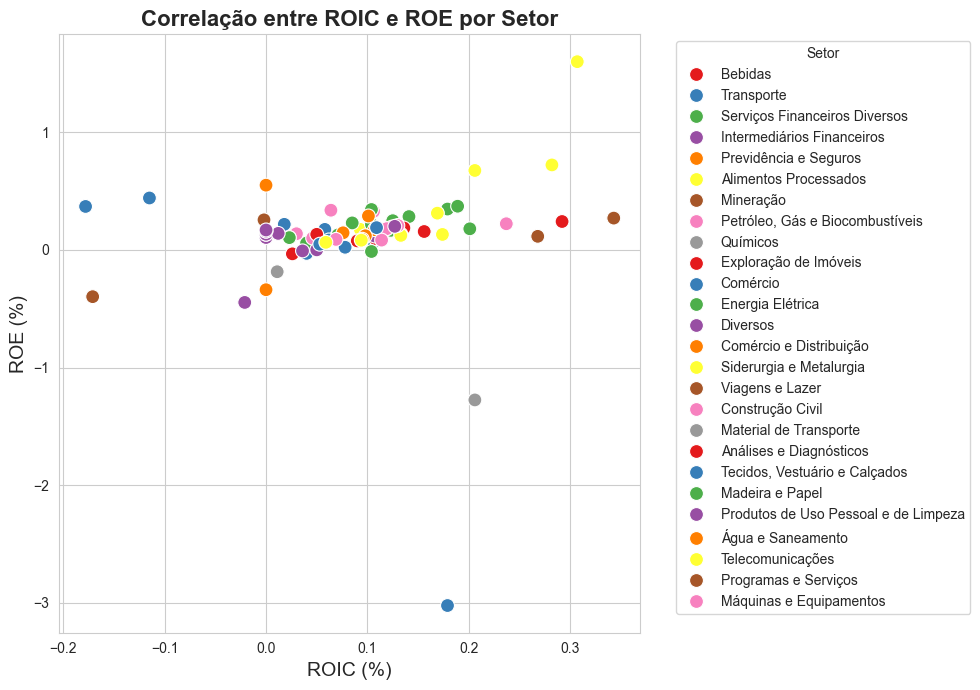

In [24]:

plt.figure(figsize=(10,7))  
sns.scatterplot(x='ROIC', y='ROE', hue='Setor', data=infor_indi_empresa, palette='Set1', s=100)

# título e rótulos
plt.title('Correlação entre ROIC e ROE por Setor', fontsize=16, weight='bold')
plt.xlabel('ROIC (%)', fontsize=14)
plt.ylabel('ROE (%)', fontsize=14)


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Setor')


plt.tight_layout()


plt.show()


O gráfico mostra a correlação entre o ROIC (Retorno sobre Capital Investido) e o ROE (Retorno sobre Patrimônio) por setor. A maioria dos setores apresenta valores de ROIC e ROE próximos de zero, indicando uma baixa variação entre os dois indicadores. Setores como "Bebidas" e "Transporte" apresentam uma dispersão maior, com variações negativas de ROE e ROIC. A concentração de pontos em torno de zero sugere que poucas empresas se destacam com retornos altos. No geral, o gráfico ajuda a identificar que, para a maioria dos setores, o retorno sobre o capital e patrimônio é similar e pouco expressivo.

C:\Users\User\AppData\Local\Temp\ipykernel_16592\2195405743.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Setor', y='Marg_Liquida', data=infor_indi_empresa, palette=palette)


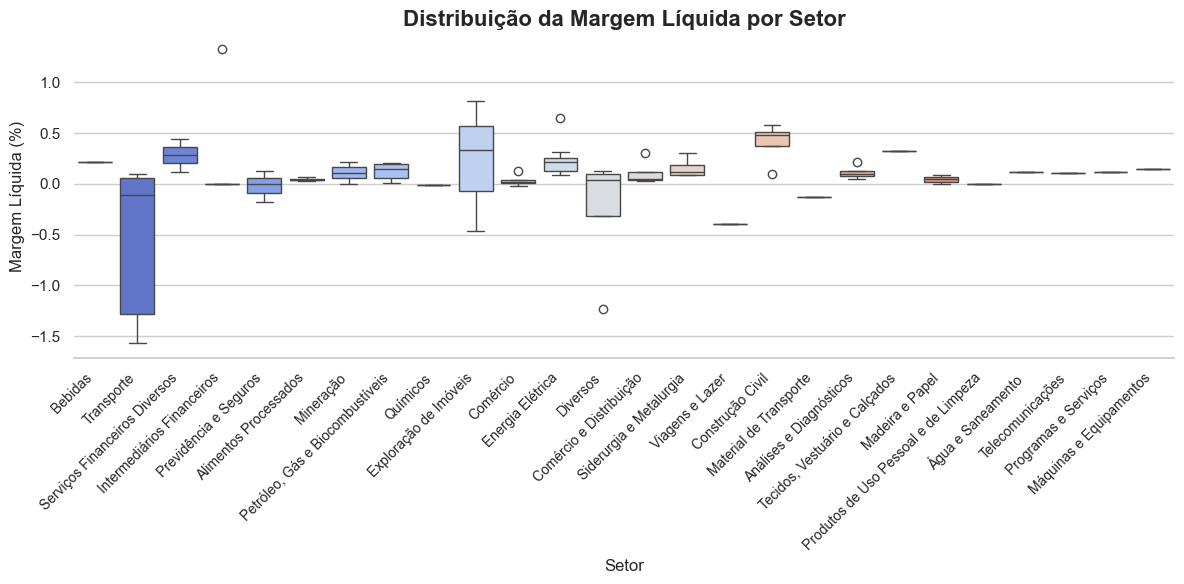

In [25]:
# GRAFICO BOXPLOT

plt.figure(figsize=(12,6))


sns.set(style="whitegrid")


palette = sns.color_palette("coolwarm", len(infor_indi_empresa['Setor'].unique()))


sns.boxplot(x='Setor', y='Marg_Liquida', data=infor_indi_empresa, palette=palette)


plt.title('Distribuição da Margem Líquida por Setor', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Inclinação 
plt.ylabel('Margem Líquida (%)', fontsize=12)
plt.xlabel('Setor', fontsize=12)


sns.despine(left=True)

# Exibindo 
plt.tight_layout()
plt.show()


O gráfico mostra a distribuição da margem líquida por setor. Observa-se que o setor de Bebidas apresenta uma margem líquida significativamente negativa, enquanto setores como Comércio e Serviços Financeiros Diversos possuem margens líquidas mais elevadas. Setores como Intermediários Financeiros e Energia Elétrica apresentam baixa variabilidade, com margens concentradas próximas a zero

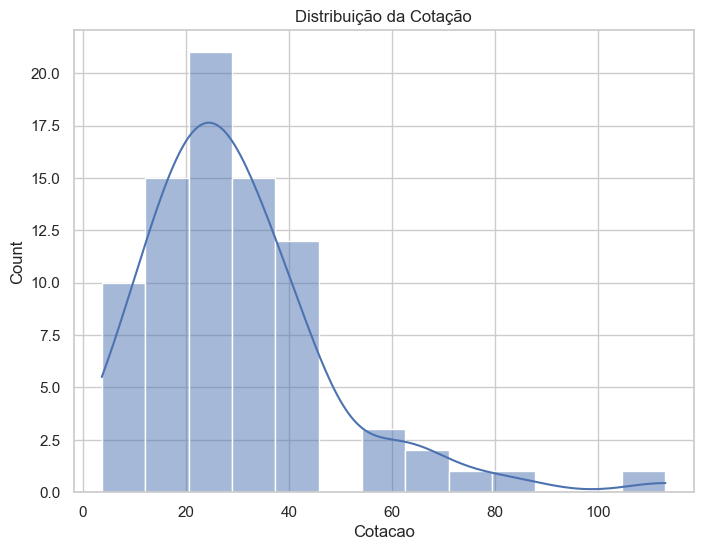

In [26]:


# Histograma para Cotacao
plt.figure(figsize=(8,6))
sns.histplot(infor_indi_empresa['Cotacao'], kde=True)
plt.title('Distribuição da Cotação')
plt.show()



O grafico indica que  a maioria das empresas tem cotações mais baixas, concentradas principalmente entre 10 e 40, e poucas têm cotações muito altas, acima de 60.

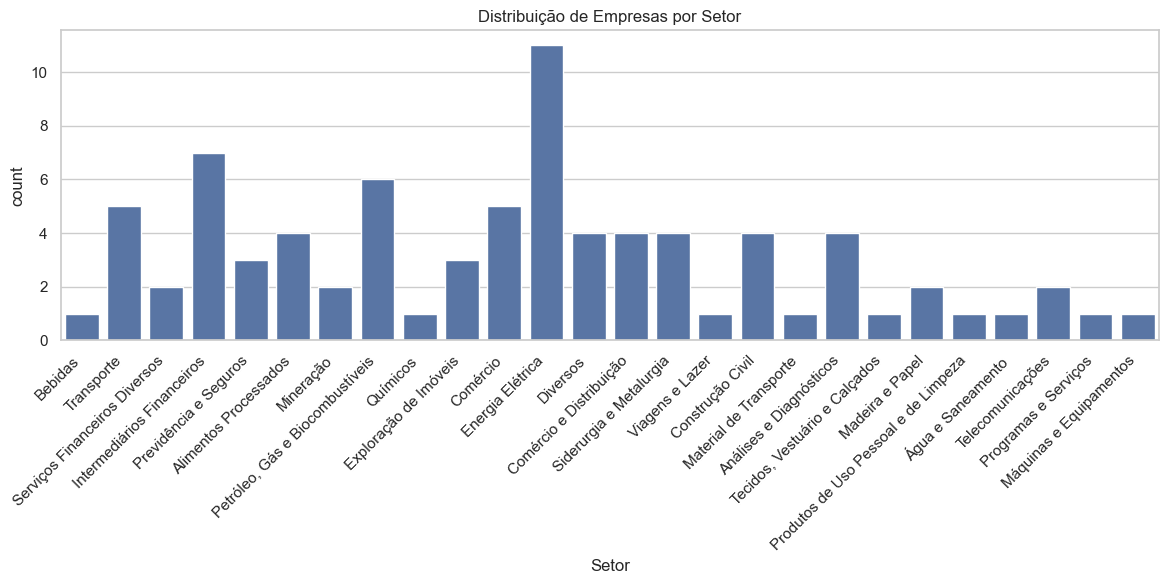

In [42]:
# Contagem de empresas por setor
# Grafico de barras
plt.figure(figsize=(12,6))
sns.countplot(x='Setor', data=infor_indi_empresa)
plt.title('Distribuição de Empresas por Setor')


plt.xticks(rotation=45, ha='right')  

plt.tight_layout()  
plt.show()


É evidente que a distribuição de empresas entre os setores não é uniforme. Alguns setores, como "Energia Eletrica", concentram um número significativamente maior de empresas, enquanto outros, como "Água e Saneamento", possuem um número bem menor.

# Conclusão

 Os gráficos indicam que há variação significativa entre os setores em termos de rentabilidade (ROIC, ROE e Margem Líquida) e quantidade de empresas. Setores mais tradicionais, como Serviços Financeiros e Energia Elétrica, têm mais empresas e, em geral, um desempenho mais consistente, enquanto setores como Bebidas apresentam maior volatilidade e desafios em lucratividade.


 # Orientações Finais

* Diversificação: Invista em diferentes setores para reduzir riscos.

* Foco em Setores Lucrativos: Concentre-se em setores com altos ROIC, ROE e margens líquidas.

* Análise de Tendências: Examine o histórico de desempenho para identificar setores com crescimento consistente.

* Avaliação de Riscos: Considere a variabilidade dos resultados e o nível de risco de cada setor.



A análise teve como objetivo principal fornecer informações claras e intuitivas sobre o comportamento das ações que compõem o índice Bovespa. Para isso, foram utilizados métodos de visualização de dados que permitem uma interpretação mais acessível e abrangente, facilitando a compreensão das tendências e variações do mercado. Com isso, buscamos oferecer insights valiosos que podem auxiliar na tomada de decisões estratégicas por investidores e profissionais do setor financeiro.AC